<a href="https://colab.research.google.com/github/lucasaltm/datascience/blob/main/Amazon_Rainforest_Degradation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://image.cnbcfm.com/api/v1/image/106975234-1636936362963-gettyimages-1228062683-AFP_1WJ4KX.jpeg?v=1636936106)


</br>

---

</br>

# Analysis on deforestation and forest fires in Brazil.

The following analysis was developed during the course on Fundamentals of Data Analysis taught by Professor Evandro Franzen at the University of Santa Cruz do Sul (UNISC) in the second semester of 2020.

Two datasets available on Kaggle were used:
- [Amazon.csv](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil): The dataset contains the numbers of forest fires reported in Brazil by state from 1998 until the end of 2016.
- [Def_area_2004_2019.csv](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation): The dataset contains deforested areas in km² in the states that make up the Legal Amazon (Acre, Amapá, Amazonas, Mato Grosso, Pará, Rondônia, Roraima, Tocantins, and Maranhão) from 1999 to 2019.

</br>

---

</br>

### Initial proposal:
At the beginning of the project, the intentions were to compare the two datasets to check if they have correlations, analyze the data to see which states have the highest degradation rates, and apply time series analysis to the Amazon.csv dataset which contains monthly data.

</br>

---

</br>

### Installation and import of necessary libraries:


In [32]:
!pip install pmdarima
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,  StandardScaler
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


</br>

---

</br>

### Reading and visualizing the data:

In [33]:
defarea = pd.read_csv('def_area_2004_2019.csv', sep=',')
defarea.columns = ["Ano","Acre","Amazonas","Amapa","Maranhao","Mato Grosso","Pará","Rondonia","Roraima","Tocantins","Total"]
 
amazon = pd.read_csv('amazon.csv', sep=',', engine='python', thousands='.', encoding = "ISO-8859-1")

amazon


,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


In [34]:
defarea

,Ano,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Pará,Rondonia,Roraima,Tocantins,Total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


</br>

---

</br>

### Data analysis:

- Recorded forest fires by state from 1998 to 2017.


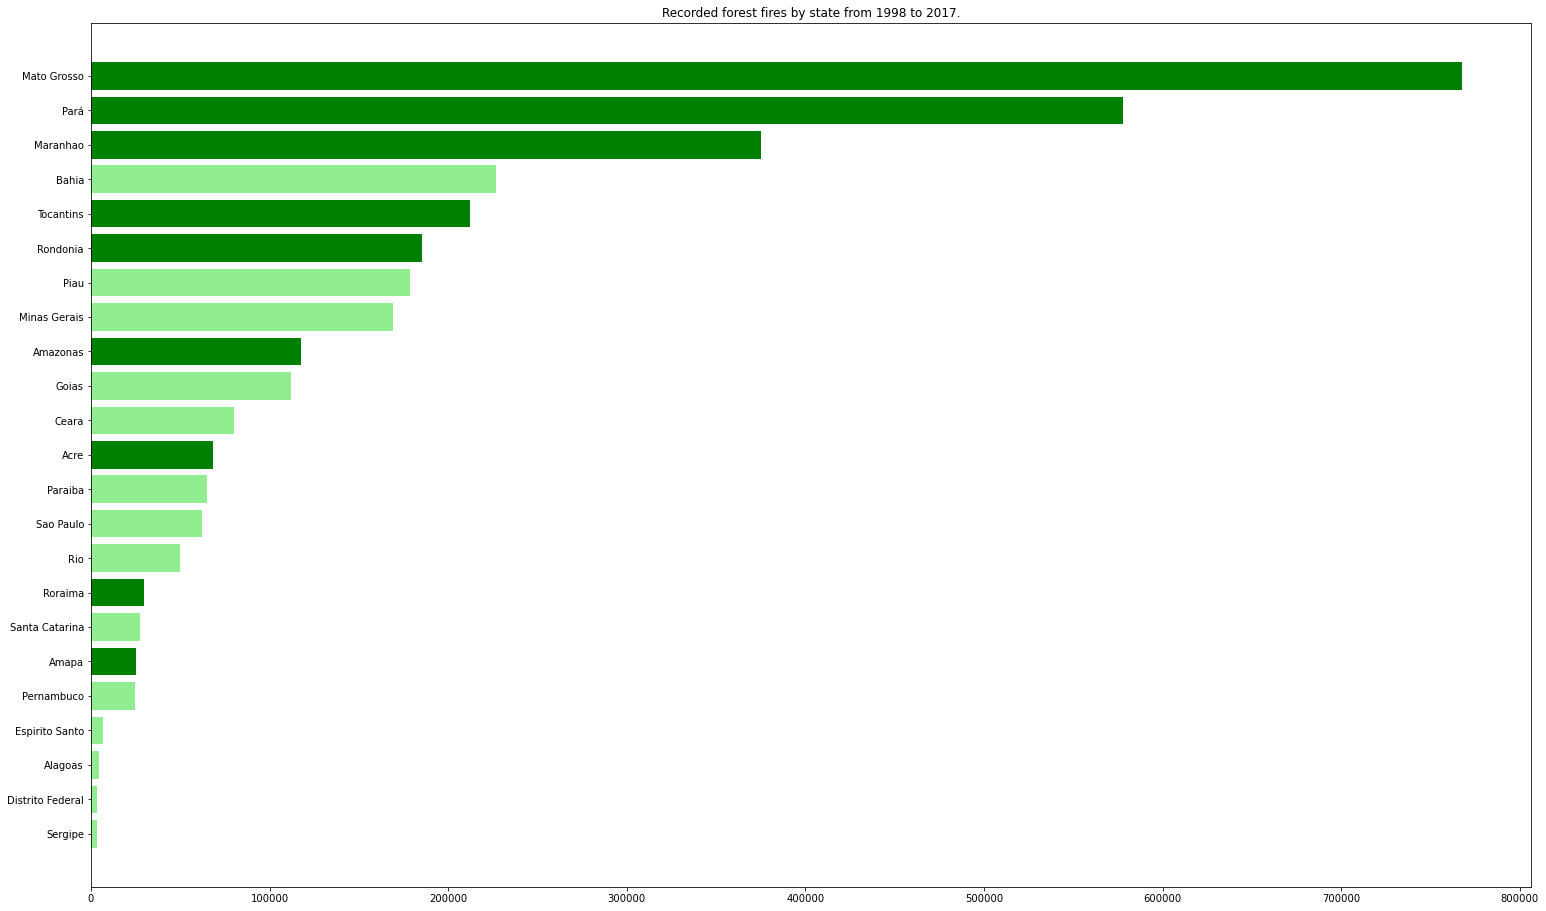

In [35]:
#The current coverage area of Legal Amazon corresponds to all states of Acre, Amapá, Amazonas, Mato Grosso, Pará, Rondônia, Roraima, Tocantins, and Maranhão.

incendios_estados = pd.DataFrame(amazon.groupby(['state'])['number'].sum())
incendios_estados = incendios_estados.sort_values('number')
fig = plt.figure(figsize=[20,12])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Recorded forest fires by state from 1998 to 2017.')
cores = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'green', 'lightgreen', 'green', 'lightgreen', 'lightgreen', 'lightgreen', 'green', 'lightgreen', 'lightgreen',
                                                                   'green','lightgreen','lightgreen','green','green','lightgreen','green','green','green']
ax.barh(incendios_estados.index,incendios_estados['number'],color=cores);

In this graph, the states were separated by colors. The states that make up the Legal Amazon are shown in dark green, while the other states are in light green. We can already notice that most of the forest fires are located in the Legal Amazon region. Of the 6 states with the highest number of fires, 5 are in the Legal Amazon region.

</br>


---


</br>


- Comparison between forest fires and deforestation in the states that make up the Legal Amazon

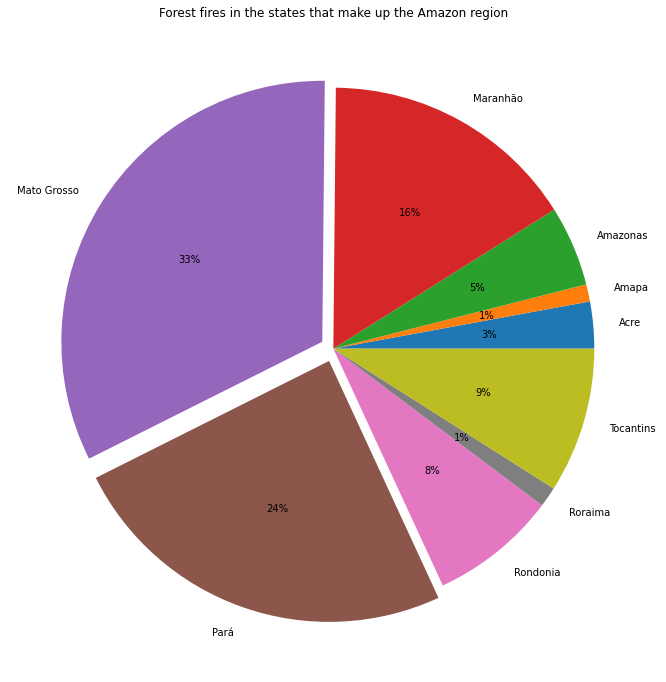

In [37]:
incendios_amazonia = amazon[(amazon['state']=='Acre') | (amazon['state']=='Amapa') | (amazon['state']=='Amazonas') | (amazon['state']=='Mato Grosso') | (amazon['state']=='Pará') |
               (amazon['state']=='Rondonia') | (amazon['state']=='Roraima') | (amazon['state']=='Tocantins') | (amazon['state']=='Maranhao')]
incendios_estados_amazonia = pd.DataFrame(incendios_amazonia.groupby(['state'])['number'].sum())
incendios_estados_amazonia

fig, (pz1) = plt.subplots(1, 1)
fig.set_size_inches(25,12)
labels = 'Acre', 'Amapa', 'Amazonas', 'Maranhão', 'Mato Grosso','Pará','Rondonia','Roraima','Tocantins'
explode = (0, 0, 0, 0,0.05,0.05,0,0,0)
pz1.set(title='Forest fires in the states that make up the Amazon region')
pz1.pie(incendios_estados_amazonia.number, autopct='%1.lf%%',labels=labels,explode=explode)
fig.show()

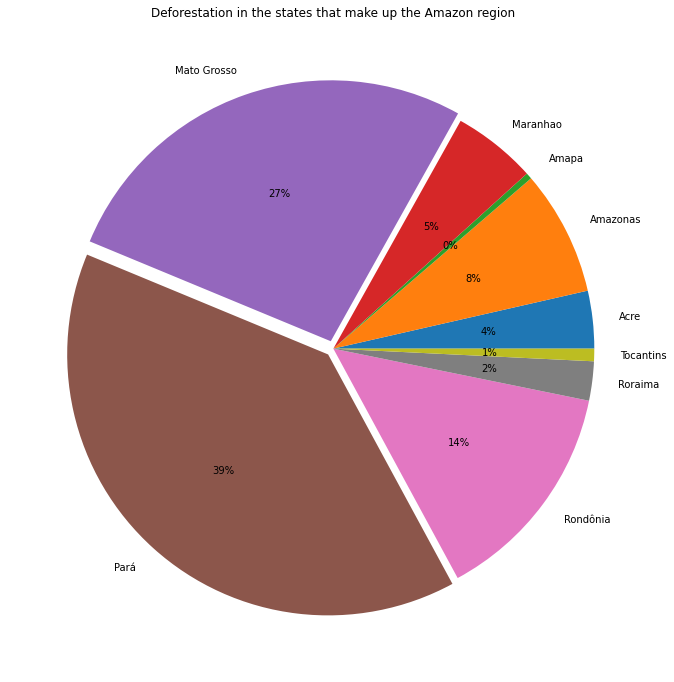

In [38]:
defarea2 = defarea.copy()
defarea2 = defarea2.drop(columns=['Ano', 'Total']).sum()

defarea2

fig, (pz1) = plt.subplots(1, 1)
fig.set_size_inches(25,12)
labels = 'Acre', 'Amazonas', 'Amapa', 'Maranhao', 'Mato Grosso','Pará','Rondônia','Roraima','Tocantins'
explode = (0, 0, 0, 0,0.03,0.03,0,0,0)

pz1.set(title='Deforestation in the states that make up the Amazon region')
pz1.pie(defarea2, autopct='%1.lf%%',labels=labels,explode=explode)
fig.show()

With these graphs, we can see a possible correlation between the number of forest fires and deforested areas in the states, that is, the higher the number of forest fires, the higher the number of deforested areas.

</br>


---


</br>


- Sum of forest fires per month in each state recorded in the dataset
Amazon.csv

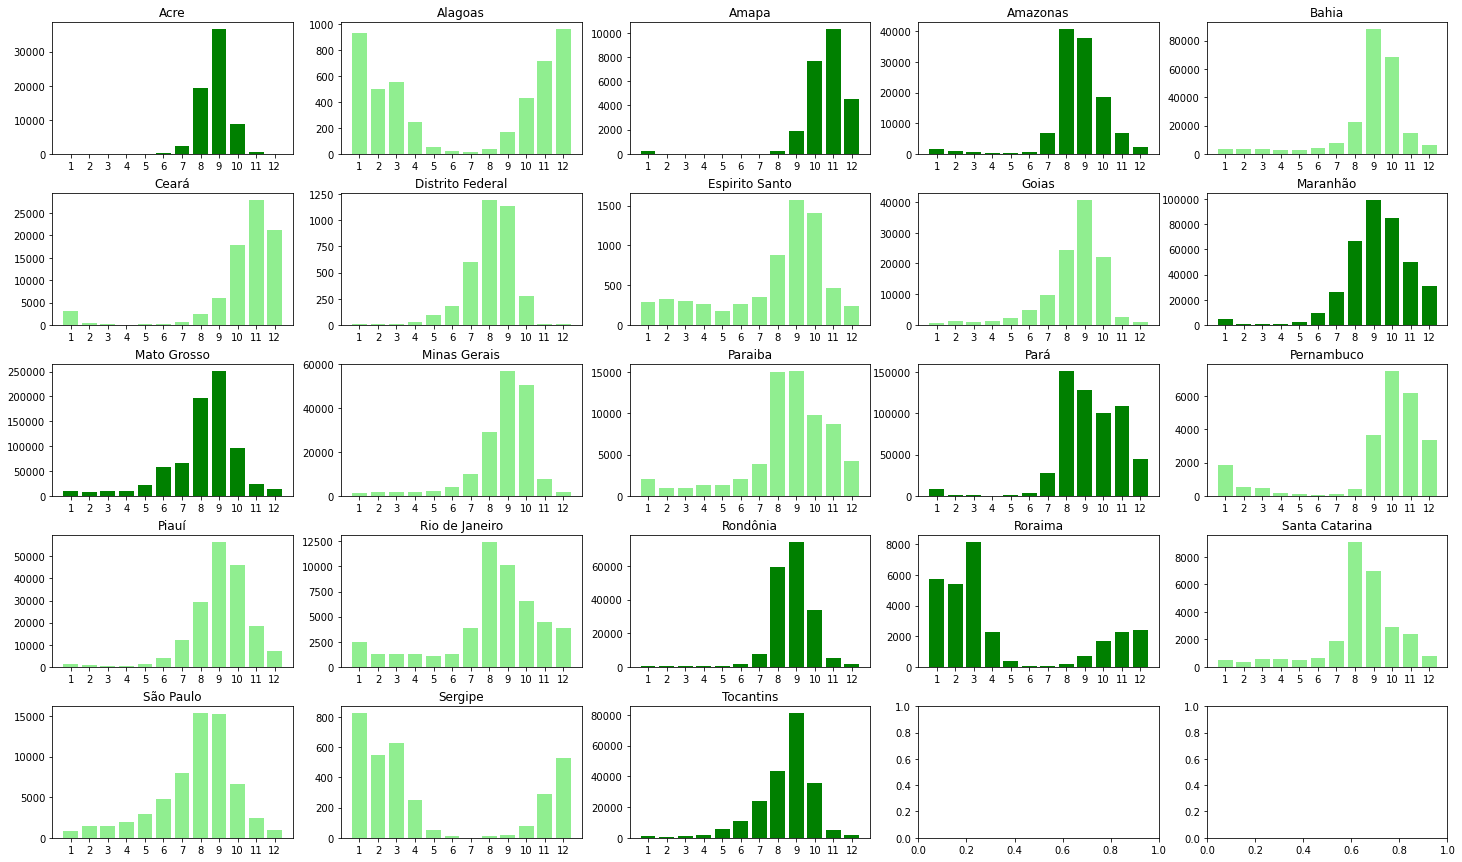

In [39]:
index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio' ,'Junho', 'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

acre = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Acre')]).groupby(['month'])['number'].sum()).reindex(index)
alagoas = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Alagoas')]).groupby(['month'])['number'].sum()).reindex(index)
amapa = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Amapa')]).groupby(['month'])['number'].sum()).reindex(index)
amazonas = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Amazonas')]).groupby(['month'])['number'].sum()).reindex(index)
bahia = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Bahia')]).groupby(['month'])['number'].sum()).reindex(index)
ceara = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Ceara')]).groupby(['month'])['number'].sum()).reindex(index)
distritof = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Distrito Federal')]).groupby(['month'])['number'].sum()).reindex(index)
espsanto = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Espirito Santo')]).groupby(['month'])['number'].sum()).reindex(index)
goias = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Goias')]).groupby(['month'])['number'].sum()).reindex(index)
maranhao = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Maranhao')]).groupby(['month'])['number'].sum()).reindex(index)
matogrosso = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Mato Grosso')]).groupby(['month'])['number'].sum()).reindex(index)
minasgerais = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Minas Gerais')]).groupby(['month'])['number'].sum()).reindex(index)
paraiba = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Paraiba')]).groupby(['month'])['number'].sum()).reindex(index)
para = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Pará')]).groupby(['month'])['number'].sum()).reindex(index)
pernambuco = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Pernambuco')]).groupby(['month'])['number'].sum()).reindex(index)
piaui = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Piau')]).groupby(['month'])['number'].sum()).reindex(index)
rio = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Rio')]).groupby(['month'])['number'].sum()).reindex(index)
rondonia = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Rondonia')]).groupby(['month'])['number'].sum()).reindex(index)
roraima = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Roraima')]).groupby(['month'])['number'].sum()).reindex(index)
santacatarina = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Santa Catarina')]).groupby(['month'])['number'].sum()).reindex(index)
saopaulo = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Sao Paulo')]).groupby(['month'])['number'].sum()).reindex(index)
sergipe = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Sergipe')]).groupby(['month'])['number'].sum()).reindex(index)
tocantins = pd.DataFrame(pd.DataFrame(amazon[(amazon['state']=='Tocantins')]).groupby(['month'])['number'].sum()).reindex(index)


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 5,sharey=False, sharex=False,squeeze=True)#sharey=True
plt.subplots_adjust(wspace=0.2, hspace=0.3)#plt.subplots_adjust(wspace=0, hspace=0.3)
labelmeses = ['1', '2', '3', '4', '5' ,'6', '7','8','9','10','11','12']



fig.set_size_inches(25,15)
fig.canvas.draw()

ax1[0].bar(acre.index,acre['number'],color='green')
ax1[0].set_xticklabels(labelmeses)
ax1[0].set(title='Acre')

ax1[1].bar(alagoas.index,alagoas['number'],color='lightgreen')
ax1[1].set_xticklabels(labelmeses)
ax1[1].set(title='Alagoas')

ax1[2].bar(amapa.index,amapa['number'],color='green')
ax1[2].set_xticklabels(labelmeses)
ax1[2].set(title='Amapa')

ax1[3].bar(amazonas.index,amazonas['number'],color='green')
ax1[3].set_xticklabels(labelmeses)
ax1[3].set(title='Amazonas')

ax1[4].bar(bahia.index,bahia['number'],color='lightgreen')
ax1[4].set_xticklabels(labelmeses)
ax1[4].set(title='Bahia')

ax2[0].bar(ceara.index,ceara['number'],color='lightgreen')
ax2[0].set_xticklabels(labelmeses)
ax2[0].set(title='Ceará')

ax2[1].bar(distritof.index,distritof['number'],color='lightgreen')
ax2[1].set_xticklabels(labelmeses)
ax2[1].set(title='Distrito Federal')

ax2[2].bar(espsanto.index,espsanto['number'],color='lightgreen')
ax2[2].set_xticklabels(labelmeses)
ax2[2].set(title='Espirito Santo')

ax2[3].bar(goias.index,goias['number'],color='lightgreen')
ax2[3].set_xticklabels(labelmeses)
ax2[3].set(title='Goias')

ax2[4].bar(maranhao.index,maranhao['number'],color='green')
ax2[4].set_xticklabels(labelmeses)
ax2[4].set(title='Maranhão')

ax3[0].bar(matogrosso.index,matogrosso['number'],color='green')
ax3[0].set_xticklabels(labelmeses)
ax3[0].set(title='Mato Grosso')

ax3[1].bar(minasgerais.index,minasgerais['number'],color='lightgreen')
ax3[1].set_xticklabels(labelmeses)
ax3[1].set(title='Minas Gerais')

ax3[2].bar(paraiba.index,paraiba['number'],color='lightgreen')
ax3[2].set_xticklabels(labelmeses)
ax3[2].set(title='Paraiba')

ax3[3].bar(para.index,para['number'],color='green')
ax3[3].set_xticklabels(labelmeses)
ax3[3].set(title='Pará')

ax3[4].bar(pernambuco.index,pernambuco['number'],color='lightgreen')
ax3[4].set_xticklabels(labelmeses)
ax3[4].set(title='Pernambuco')

ax4[0].bar(piaui.index,piaui['number'],color='lightgreen')
ax4[0].set_xticklabels(labelmeses)
ax4[0].set(title='Piauí')

ax4[1].bar(rio.index,rio['number'],color='lightgreen')
ax4[1].set_xticklabels(labelmeses)
ax4[1].set(title='Rio de Janeiro')

ax4[2].bar(rondonia.index,rondonia['number'],color='green')
ax4[2].set_xticklabels(labelmeses)
ax4[2].set(title='Rondônia')

ax4[3].bar(roraima.index,roraima['number'],color='green')
ax4[3].set_xticklabels(labelmeses)
ax4[3].set(title='Roraima')

ax4[4].bar(santacatarina.index,santacatarina['number'],color='lightgreen')
ax4[4].set_xticklabels(labelmeses)
ax4[4].set(title='Santa Catarina')

ax5[0].bar(saopaulo.index,saopaulo['number'],color='lightgreen')
ax5[0].set_xticklabels(labelmeses)
ax5[0].set(title='São Paulo')

ax5[1].bar(sergipe.index,sergipe['number'],color='lightgreen')
ax5[1].set_xticklabels(labelmeses)
ax5[1].set(title='Sergipe')

ax5[2].bar(tocantins.index,tocantins['number'],color='green')
ax5[2].set_xticklabels(labelmeses)
ax5[2].set(title='Tocantins')

plt.show()


In these graphs, the same color pattern was used: dark green for states that make up the Legal Amazon and light green for others. Here we can already notice a possible seasonality, in most states, there is a peak of forest fires starting from the second half of the year.

</br>


---


</br>

- Sum of all forest fires per month

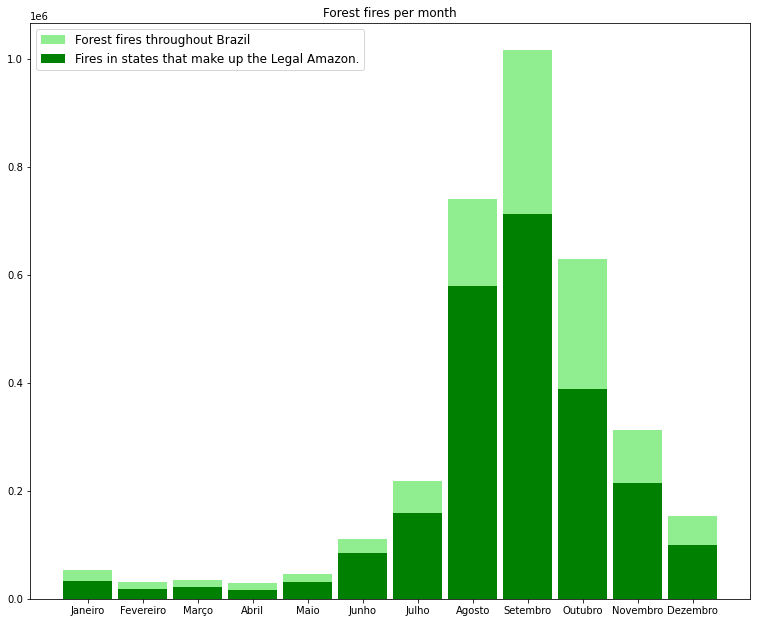

In [42]:
incendios_mes = pd.DataFrame(amazon.groupby(['month'])['number'].sum())

incendios_mes = incendios_mes.reindex(index)
incendios_mes

incendios_mes_amazonia = pd.DataFrame(incendios_amazonia.groupby(['month'])['number'].sum())
incendios_mes_amazonia
incendios_mes_amazonia.reindex(index)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Forest fires per month')

ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio' ,'Junho', 'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])
ax.bar(incendios_mes.index,incendios_mes['number'],width=0.9,color='lightgreen', label='Forest fires throughout Brazil')
ax.bar(incendios_mes_amazonia.index,incendios_mes_amazonia['number'],width=0.9,color='green', label='Fires in states that make up the Legal Amazon.')
ax.legend(prop={'size': 12})
plt.show()

Here we can clearly notice the seasonality in the second semester.

</br>


---


</br>

- Forest Fires and Deforestation over the years and application of Pearson's correlation test and linear regression on the data.

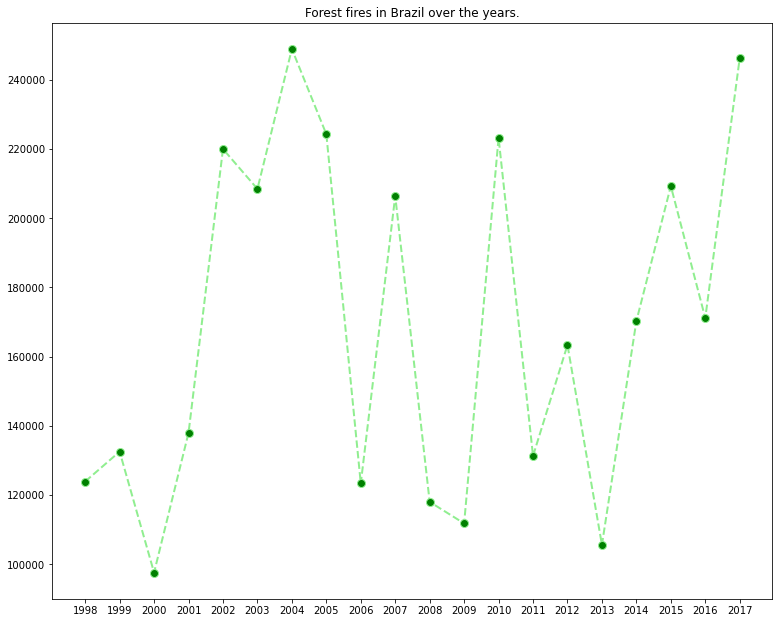

In [44]:
incendios_ano = pd.DataFrame(amazon.groupby(['year'])['number'].sum())

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Forest fires in Brazil over the years.')

ax.set_xticks(np.arange(min(defarea.index), max(incendios_ano.index)+1, 1.0))

ax.plot(incendios_ano.index,incendios_ano['number'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green');

Pearson correlation coefficient:  0.2168903116020578





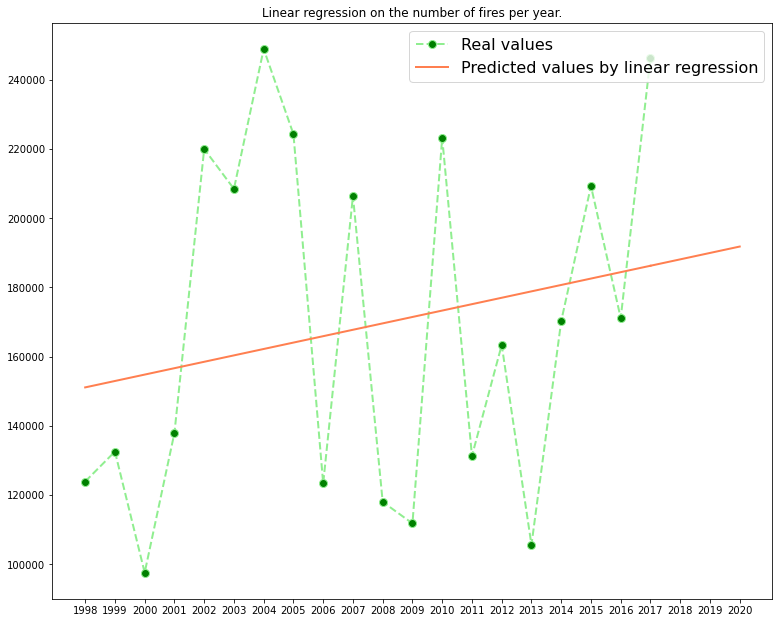

In [50]:
correlacao = pearsonr(incendios_ano.index,incendios_ano['number'])
print('Pearson correlation coefficient: ', correlacao[0])
print('\n\n')

preditor_lr = LinearRegression()
X = incendios_ano.index.values
X = X.reshape(-1,1)
y = incendios_ano["number"]
#print(X)
#print(y)

#fit
preditor_lr.fit(X,y)
#print(preditor_lr.coef_)
#print(preditor_lr.intercept_)

#predict
X_e = np.array([2017,2018,2019,2020])
y_pred = preditor_lr.predict(X_e.reshape(-1,1))
#print(y_pred)

y_predicted = preditor_lr.predict(X)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])

ax.set(title='Linear regression on the number of fires per year.')
ax.set_xticks(np.arange(min(incendios_ano.index), max(X_e)+1, 1.0))

#ax.scatter(incendios_ano.index,incendios_ano['number'],color='green')
ax.plot(incendios_ano.index,incendios_ano['number'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green', label='Real values');


ax.plot(X_e,y_pred,color='coral',linewidth=2);
ax.plot(X,y_predicted,color='coral',linewidth=2,label='Predicted values by linear regression');
ax.legend(prop={'size': 16});

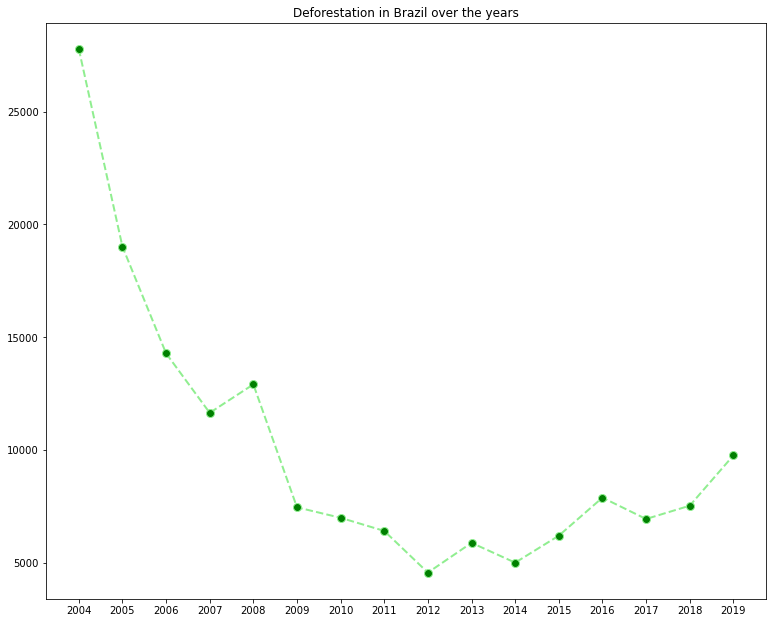

In [52]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Deforestation in Brazil over the years')

ax.set_xticks(np.arange(min(defarea['Ano']), max(defarea['Ano']+1), 1.0))

ax.plot(defarea['Ano'],defarea['Total'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green');

Pearson correlation coefficient:  -0.6852841491707095





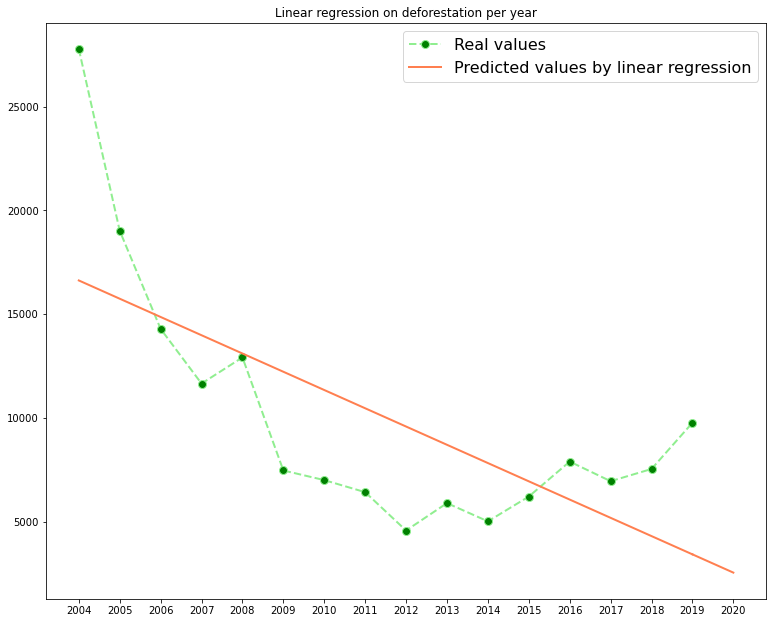

In [58]:
correlacao = pearsonr(defarea['Ano'],defarea['Total'])
print('Pearson correlation coefficient: ', correlacao[0])
print('\n\n')

preditor_lr = LinearRegression()
X = defarea['Ano'].values
X = X.reshape(-1,1)
y = defarea['Total']
#print(X)
#print(y)

#fit
preditor_lr.fit(X,y)
#print(preditor_lr.coef_)
#print(preditor_lr.intercept_)

#predict
X_e = np.array([2019,2020])
y_pred = preditor_lr.predict(X_e.reshape(-1,1))
#print(y_pred)

y_predicted = preditor_lr.predict(X)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])

ax.set(title='Linear regression on deforestation per year')
ax.set_xticks(np.arange(min(incendios_ano.index), max(X_e)+1, 1.0))

#ax.scatter(incendios_ano.index,incendios_ano['number'],color='green')
ax.plot(defarea['Ano'],defarea['Total'],color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green', label='Real values');

ax.plot(X,y_predicted,color='coral',linewidth=2, label='Predicted values by linear regression');
ax.plot(X_e,y_pred,color='coral',linewidth=2);
ax.legend(prop={'size': 16});


In the forest fires graph, we can see that the total number of fires per year does not follow a clear pattern, while the total area deforested per year has a visible but not very strong negative correlation.

In the forest fires graph, the Pearson test resulted in 0.21, meaning a very weak positive correlation, while in the deforestation graph, the Pearson test resulted in -0.68, meaning a moderate negative correlation.

</br>

---

</br>

- Application of Time Series on the forest fires dataframe.

In [59]:
amazon2 = amazon.copy()
def meses(month):
    if month == 'Janeiro':
        return 1
    elif month == 'Fevereiro':
        return 2
    elif month == 'Março':
        return 3
    elif month == 'Abril':
        return 4
    elif month == 'Maio':
        return 5
    elif month == 'Junho':
        return 6   
    elif month == 'Julho':
        return 7
    elif month == 'Agosto':
        return 8
    elif month == 'Setembro':
        return 9
    elif month == 'Outubro':
        return 10
    elif month == 'Novembro':
        return 11
    elif month == 'Dezembro':
        return 12

amazon2['month2'] = amazon2['month'].apply(lambda x : meses(x))
amazon2['Datetime'] = pd.to_datetime(amazon2[['year','month2']].astype(str).apply(' '.join, 1), format='%Y %m')
amazon2 = pd.DataFrame(amazon2.groupby(['Datetime'])['number'].sum())

#amazon2 = amazon2.set_index('date')

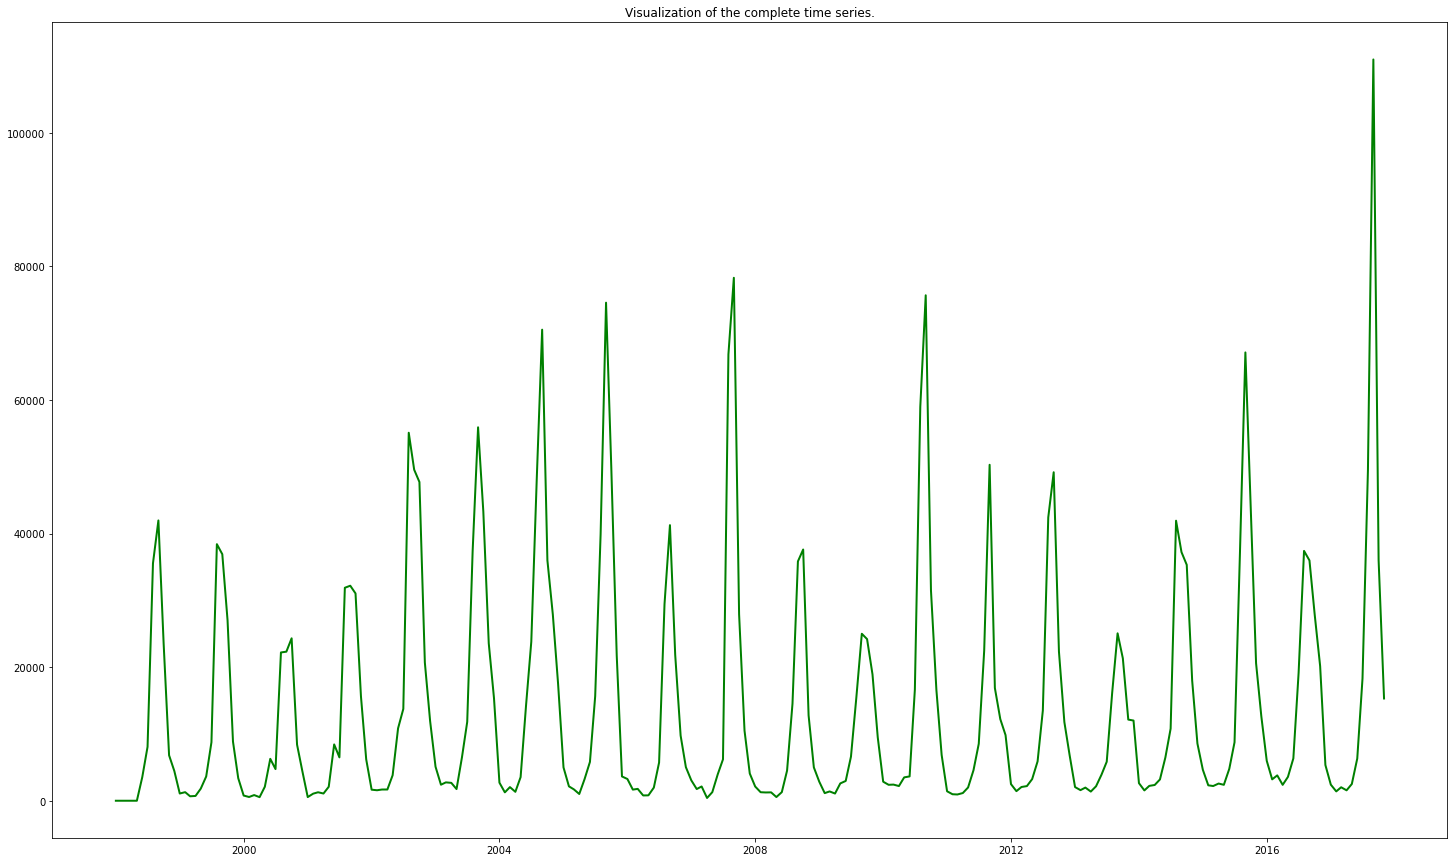

In [63]:
#Visualização da Série temporal completa
datain = '1998-1'
datafim = '2017-11'

amazon3 = amazon2[datain:datafim]
img, ax = plt.subplots (1,1,sharex=True,sharey=True, figsize=[25,15])
#ax.set_xticks(np.arange(min(amazon3.index), max(amazon3.index)+1, 1.0))
ax.set(title='Visualization of the complete time series.')
ax.plot (amazon3.index,amazon3['number'],color='green',linewidth=2);


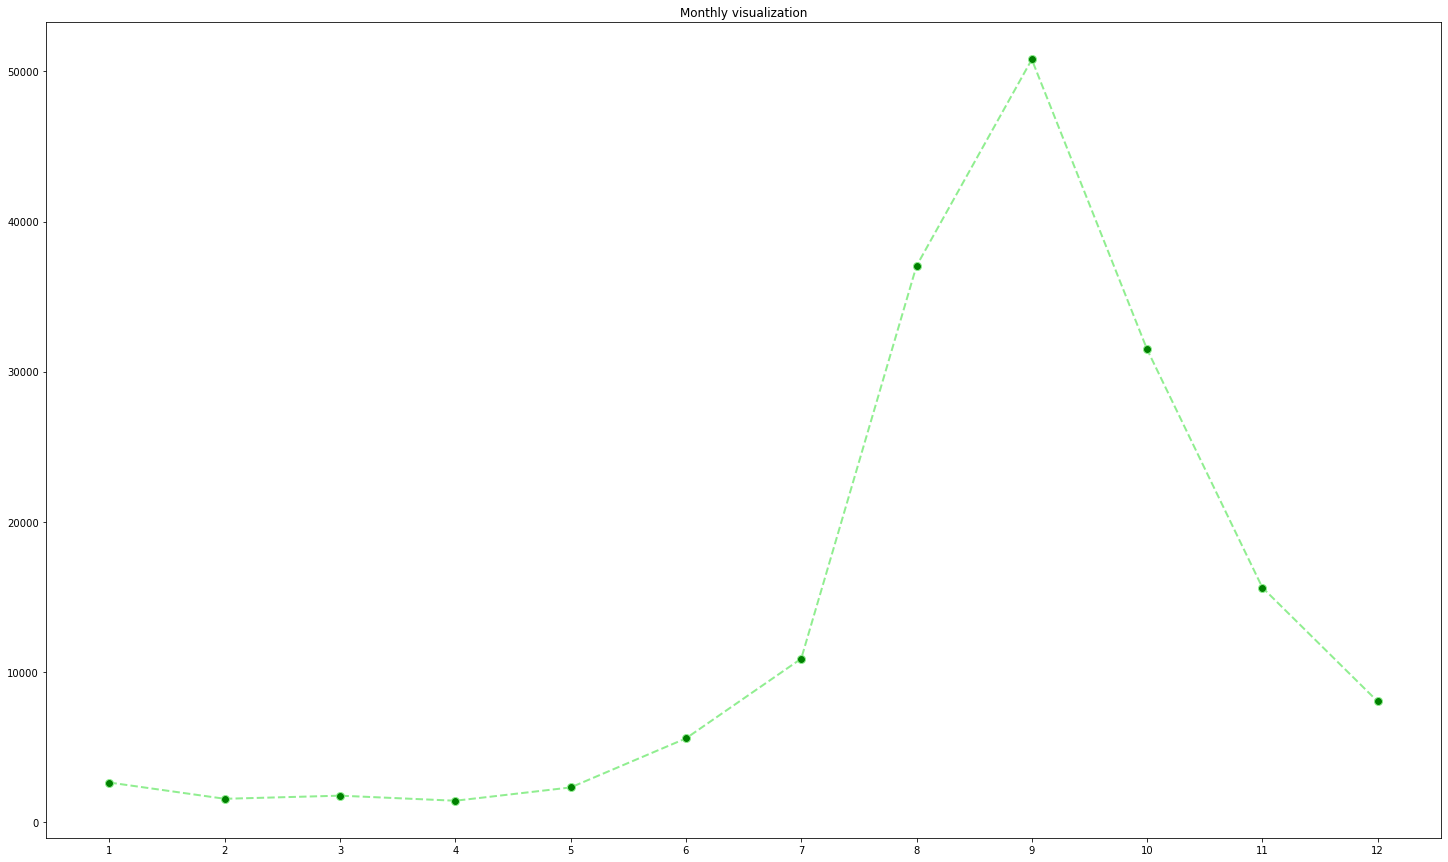

In [64]:
#Visualização por mês

amazon3 = amazon2.copy()


amazon3 = amazon2.groupby([lambda x: x.month]).mean()
imagem, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=[25,15])
ax.set_xticks(np.arange(min(amazon3.index), max(amazon3.index)+1, 1.0))
ax.set(title='Monthly visualization')
ax.plot(amazon3,color='lightgreen',marker='o',linestyle='dashed',linewidth=2, markersize=8, markerfacecolor='green');

[Text(0.5, 1.0, 'Randomness')]

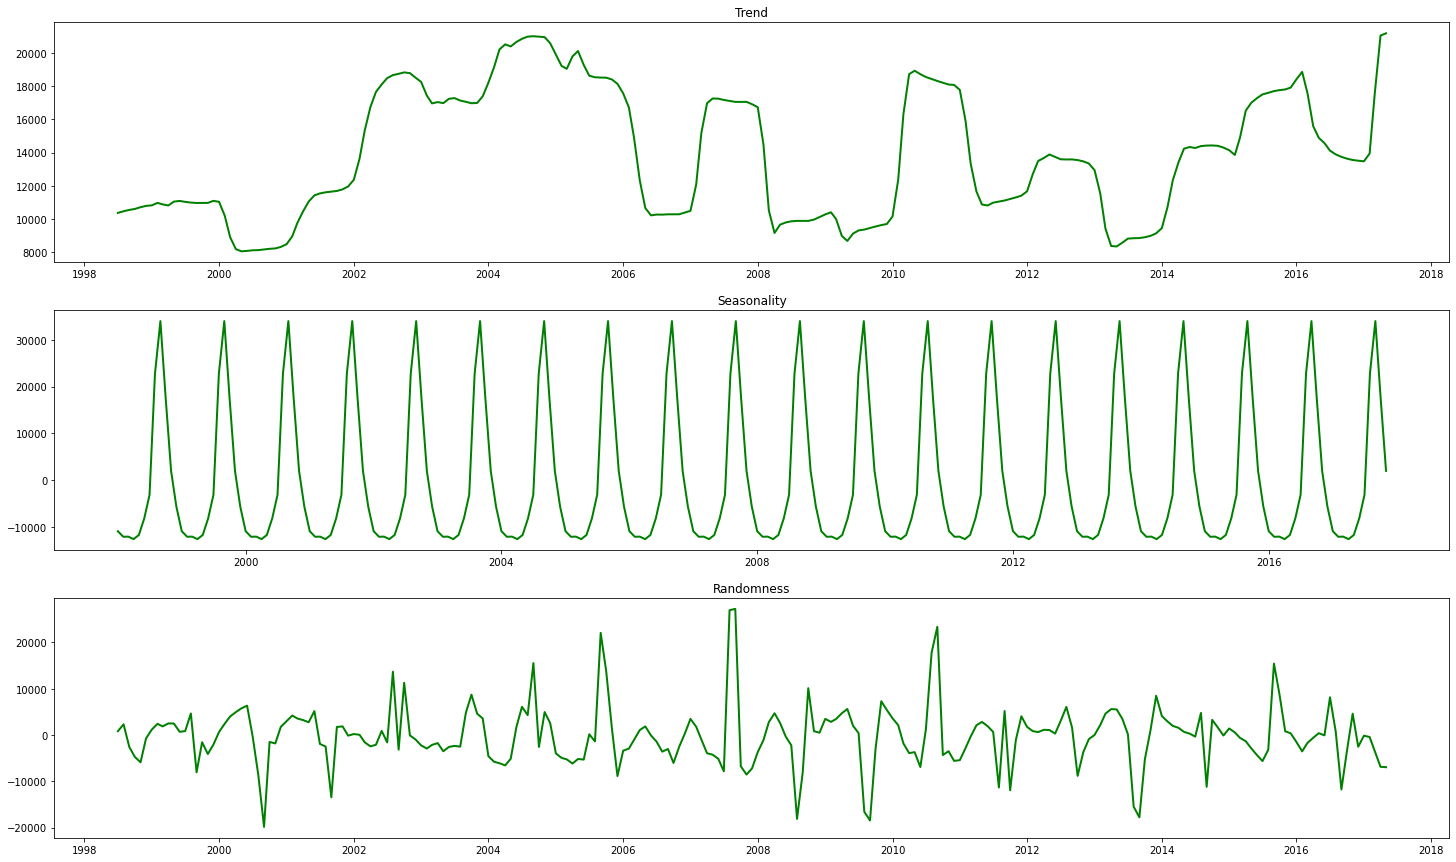

In [66]:
decomposicao = seasonal_decompose(amazon2)

tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
aleatorio = decomposicao.resid

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,squeeze=True)
#plt.subplots_adjust(wspace=0, hspace=0.3)

fig.set_size_inches(25,15)
fig.canvas.draw()

ax1.plot(tendencia,color='green',linewidth=2, markersize=8)
ax1.set(title='Trend')
ax2.plot(sazonalidade,color='green',linewidth=2, markersize=8)
ax2.set(title='Seasonality')
ax3.plot(aleatorio,color='green',linewidth=2, markersize=8)
ax3.set(title='Randomness')

By applying time series analysis on the Amazon.csv dataframe, we can conclude that there is not a very clear trend, the seasonality that was analyzed previously really exists and follows a pattern, and there is also a large randomness in the data.

</br>



---

</br>

- Use of ARIMA for attempting to forecast for future years.

In [67]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(amazon2, order=(2, 1, 2),freq=amazon2.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                  239
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2570.167
Date:                Sat, 01 Apr 2023   AIC                           5150.334
Time:                        04:20:24   BIC                           5167.695
Sample:                    01-01-1998   HQIC                          5157.331
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5309      0.072     21.264      0.000       1.390       1.672
ar.L2         -0.7998      0.042    -19.234      0.000      -0.881      -0.718
ma.L1         -1.7730      0.107    -16.555      0.000      -1.983      -1.563
ma.L2          0.7938      0.105      7.548      0.000       0.588       1.000
sigma2      1.818e+08   2.99e-10   6.08e+17      0.000    1.82e+08    1.82e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):               575.16
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+33. Standard errors may be unstable.
"""

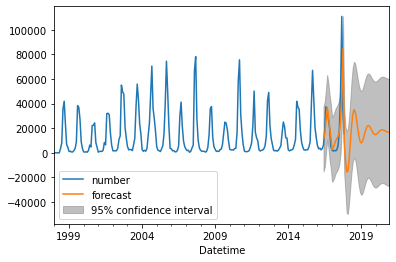

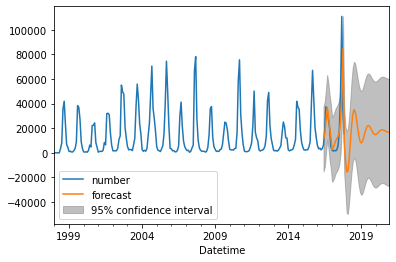

In [68]:
from statsmodels.graphics.tsaplots import plot_predict
ax = amazon2.plot()
plot_predict(modelo_treinado, '2016-06-01', '2020-12-01', ax = ax, plot_insample = True)

The results were not very good, the margin of errors was quite large for future values due to the randomness of the data and not following a very clear trend.

</br>


---


</br>

- Verification of correlation between the number of forest fires and deforested areas in the Legal Amazon region.

In [69]:
defarea2

Acre            5722
Amazonas       12425
Amapa            616
Maranhao        8318
Mato Grosso    43065
Pará           62778
Rondonia       22279
Roraima         3891
Tocantins       1241
dtype: int64

In [70]:
incendios_desmatamentos = incendios_estados_amazonia.copy()
incendios_desmatamentos.columns = ["Incêndios"]

dfaindex = ['Acre', 'Amapa', 'Amazonas', 'Maranhao', 'Mato Grosso' ,'Pará', 'Rondonia','Roraima','Tocantins']
defarea3 = defarea2.copy()
defarea3 = defarea3.reindex(dfaindex)

incendios_desmatamentos['Desmatamentos'] = defarea3

inc_t = incendios_desmatamentos['Incêndios'].sum()
desm_t = incendios_desmatamentos['Desmatamentos'].sum()

incendios_desmatamentos['Incêndios_P'] = incendios_desmatamentos['Incêndios'] * 100 / inc_t
incendios_desmatamentos['Desmatamentos_P'] = incendios_desmatamentos['Desmatamentos'] * 100 / desm_t

incendios_desmatamentos

,Incêndios,Desmatamentos,Incêndios_P,Desmatamentos_P
state,,,,
Acre,68345,5722,2.896943,3.568778
Amapa,25116,616,1.064593,0.384196
Amazonas,117467,12425,4.979080,7.749400
Maranhao,375279,8318,15.906971,5.187888
Mato Grosso,767890,43065,32.548594,26.859388
Pará,577841,62778,24.492977,39.154271
Rondonia,185387,22279,7.858008,13.895282
Roraima,29454,3891,1.248468,2.426794
Tocantins,212432,1241,9.004366,0.774004


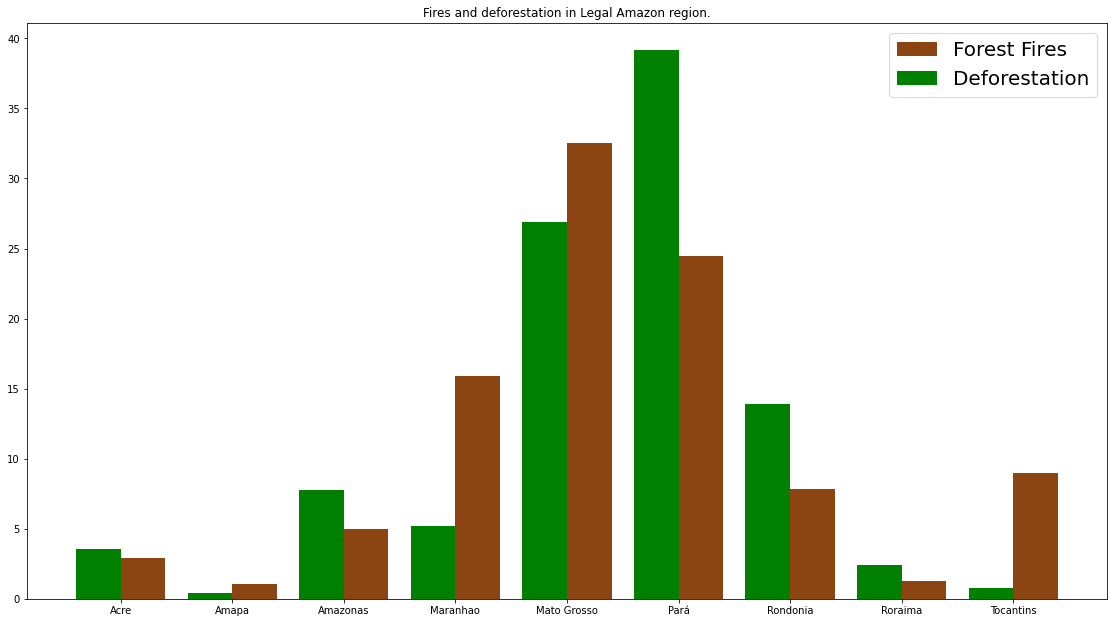

In [74]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Fires and deforestation in Legal Amazon region.')

ax.bar(incendios_desmatamentos.index,incendios_desmatamentos['Incêndios_P'], color='saddlebrown', width=0.4,align='edge', label="Forest Fires");
ax.bar(incendios_desmatamentos.index,incendios_desmatamentos['Desmatamentos_P'], color='green', width=-0.4,align='edge', label="Deforestation");

ax.legend(prop={'size': 20});

Pearson correlation coefficient:  0.8184435910873751




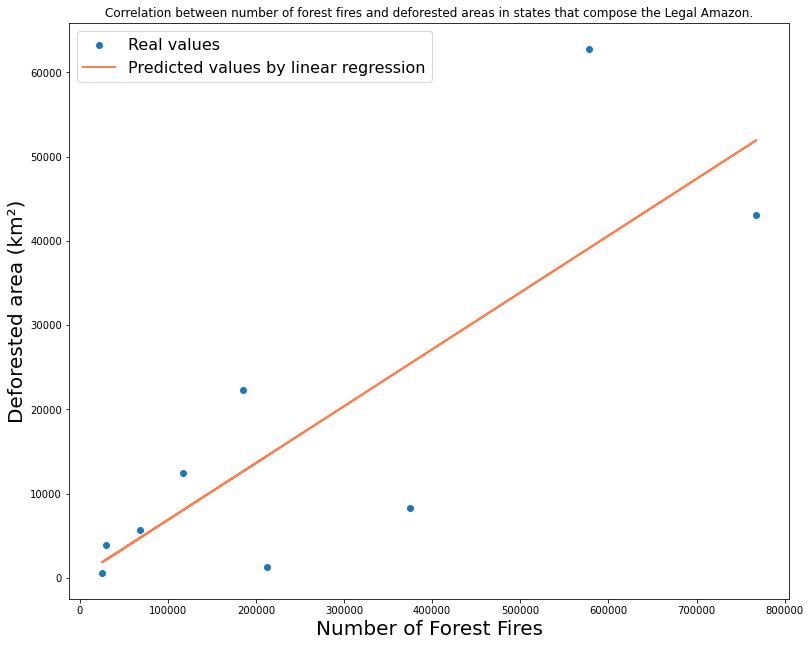

In [78]:
incendios_desmatamentos2 = incendios_desmatamentos.copy()
#incendios_desmatamentos2 = incendios_desmatamentos2.sort_values('Incêndios')





correlacao = pearsonr(incendios_desmatamentos2['Incêndios'],incendios_desmatamentos2['Desmatamentos'])
print('Pearson correlation coefficient: ', correlacao[0])
print('\n')

X = incendios_desmatamentos2['Incêndios'].values
X = X.reshape(-1,1)
y = incendios_desmatamentos2['Desmatamentos']

preditor_lr.fit(X,y)
y_predicted = preditor_lr.predict(X)

fig = plt.figure(figsize=[10,8])
ax = fig.add_axes([0,0,1,1])
ax.set(title='Correlation between number of forest fires and deforested areas in states that compose the Legal Amazon.');
plt.scatter(incendios_desmatamentos2['Incêndios'],incendios_desmatamentos2['Desmatamentos'], label='Real values');
ax.plot(X,y_predicted,color='coral',linewidth=2, markerfacecolor='red',label='Predicted values by linear regression');
ax.set_xlabel('Number of Forest Fires', fontsize=20);
ax.set_ylabel('Deforested area (km²)', fontsize=20);

ax.legend(prop={'size': 16});





</br>


---


</br>

# Final considerations:
- Notable seasonality in the second half of the year, we can observe a peak in the number of forest fires starting in June in the vast majority of states.
- There is a possible correlation between the number of fires and deforested areas in each state, meaning that if a state has many fires, there is a probability that the deforested area is also large.
- There doesn't seem to be a correlation between the annual numbers of forest fires and deforested areas. The number of fires appears to be increasing while the deforested areas appear to be decreasing.